In [17]:
import numpy as np
import random as rd
import pandas as pd

n = int(input("Enter no. of rows:"))
m = int(input("Enter no. of columns:"))

Map = np.full((n+2,m+2),0)

Map[0]=-999
Map[n+1]=-999
Map[:,0]=-999
Map[:,m+1]=-999

#Generating a Random 2D map
def gen_random_map(Map,n,m):
    tempy1 = rd.randint(1+1,n-2 +1)
    tempy2 = rd.randint(1+1,n-2 + 1)
    tempx = rd.randint(1+1,m-2 + 1)

    for i in range(1,n+1):
        Map[i][tempx] = -999


    for i in range(1,m+1):
        if i<tempx:
            Map[tempy1][i]=-999
        else:
            Map[tempy2][i]=-999
    
    miny = min((tempy1,tempy2))
    maxy = max((tempy1,tempy2))

    Map[rd.randint(1,miny)][tempx]=0
    Map[rd.randint(maxy+1,n)][tempx]=0
    Map[tempy1][rd.randint(1,tempx-1)]=0
    Map[tempy2][rd.randint(tempx+1,m-1)]=0
    return Map


#generating a map and for convinience of looping I choose 1,1 as goal and n,m as start and that they already got their reward values.
Map = gen_random_map(Map,n,m)
Map[1][m]=1
Map[n][1]=-1
Value = Map


Enter no. of rows: 10
Enter no. of columns: 10


In [18]:
def update_cells(arr):
    Y=0.9
    P=0.8
    arr = arr.astype(float)
    updated = arr.copy()
    for i in range(1, n+1):
        for j in range(1, m+1 ):
            if arr[i, j] not in (-999,1,-1):
                
                # Extract surrounding values
                neighbors = np.array([arr[i-1,j],arr[i+1,j],arr[i,j-1],arr[i,j+1]])
                
                # if i==1 and j==2:
                #     print(neighbors)
                # Ignore -999 values
                # valid_neighbors = neighbors[neighbors != -999]
                
                # if valid_neighbors.size > 0:
                #     max_value = np.max(valid_neighbors)
                    
                    
                ### Calculate weighted sum
                max_action=0   #####choosing the direction which gives max value for the action
                for k in neighbors:
                    weighted_sum = 0.0
                    weighted_sum += P*(Y*k) if k!= -999 else P*Y*arr[i,j]  #for the walls I assume that they collide and return to original cell
                    other_neighbours = neighbors[neighbors != k]
                    q = (1-P)/other_neighbours.size if other_neighbours.size !=0 else 0
                   
                    for t in other_neighbours:
                        weighted_sum += q*(Y*k) if k!= -999 else q*Y*arr[i,j]
                    
                    if weighted_sum > max_action:
                        max_action = weighted_sum

                    
                    # if(other_neighbours.size == 3):
                    #     weighted_sum += ((1-P)/other_neighbours.size)*Y*sum(other_neighbours)
                        
                    # else:
                    #     weighted_sum += ((1-P)/other_neighbours.size)*Y*sum(other_neighbours) if other_neighbours.size != 0 else 0
                    #     weighted_sum +=((1-P)/other_neighbours.size))*Y*arr[i,j]

                    

                    
                    
                    # for value in valid_neighbors:
                    #     if valid_neighbors.size==5 and value == arr[i][j]:
                    #         continue
                    #     if value == max_value:
                    #         # if value == 1:
                    #         #     r=1;
                    #         # else:
                    #         #     r=0
                    #         weighted_sum += 0.8*(0+Y*value)
                    #     else:
                    #         # if value == -1:
                    #         #     r=-1;
                    #         # else:
                    #         #     r=0
                    #         weighted_sum += (0.2 / (valid_neighbors.size - 1))*(0+Y*value)
                    #     # print(weighted_sum)
                        
                updated[i, j] = max_action
    
    return np.round(updated,2)

In [27]:
epochs = 50  #no. of iterations
Map[1][m]=1
Map[6][7]=1

#More the matrix size, Higher the number of epochs need to complete the policy profile

Value = Map
for i in range(epochs):
    Value = update_cells(Value)
    
print(pd.DataFrame(Map))
print(pd.DataFrame(Value))

     0    1    2    3    4    5    6    7    8    9    10   11
0  -999 -999 -999 -999 -999 -999 -999 -999 -999 -999 -999 -999
1  -999    0 -999    0    0    0    0    0    0    0    1 -999
2  -999    0    0    0    0    0    0    0    0    0    0 -999
3  -999    0 -999    0    0    0    0    0    0    0    0 -999
4  -999    0 -999 -999 -999 -999 -999    0 -999 -999 -999 -999
5  -999    0 -999    0    0    0    0    0    0    0    0 -999
6  -999    0 -999    0    0    0    0    1    0    0    0 -999
7  -999    0    0    0    0    0    0    0    0    0    0 -999
8  -999    0 -999    0    0    0    0    0    0    0    0 -999
9  -999    0 -999    0    0    0    0    0    0    0    0 -999
10 -999   -1 -999    0    0    0    0    0    0    0    0 -999
11 -999 -999 -999 -999 -999 -999 -999 -999 -999 -999 -999 -999
       0       1       2       3       4       5       6       7       8   \
0  -999.0 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00   
1  -999.0    0.32 -999.00  

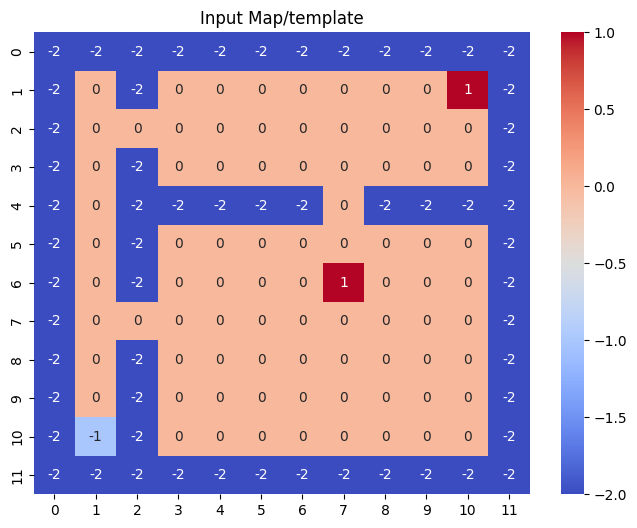

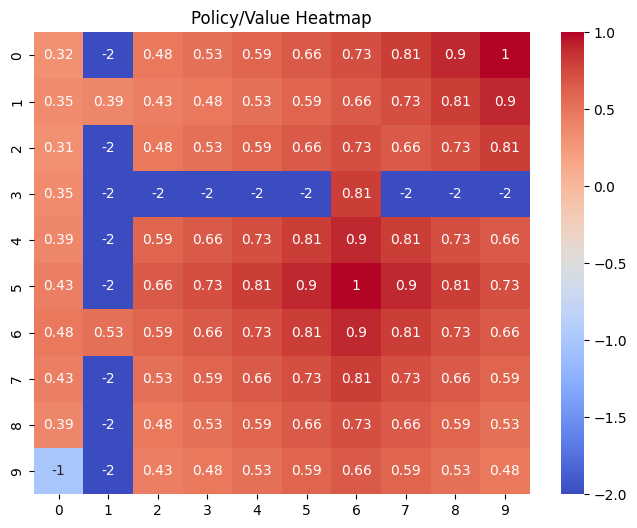

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#labelling with values to visualise the walls
value2 = Value[1:n+1,1:m+1]
value2[value2 == -999] =-2
Map2 = Map.copy()
Map2[Map2 == -999]=-2


#Plots to visualize the map
plt.figure(figsize=(8, 6)) 
sns.heatmap(Map2, annot=True, cmap='coolwarm', cbar=True)
plt.title('Input Map/template')
plt.show()


plt.figure(figsize=(8,6)) 
sns.heatmap(value2, annot=True, cmap='coolwarm', cbar=True)
plt.title('Policy/Value Heatmap')
plt.show()